# 基于多天线技术的NOMA系统物理层安全性研究

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [19]:
# 仿真参数
num_simulations = 10000  # 仿真次数
num_antennas = 4  # 天线数目
snr_dbs = np.arange(0, 21, 2)  # SNR范围（单位：dB）
threshold_legal = 1  # 合法用户容量阈值
threshold_eavesdropper = 0.5  # 非法用户容量阈值
power_allocation_legal = 0.7  # 合法用户功率分配系数
power_allocation_eavesdropper = 1 - power_allocation_legal  # 非法用户功率分配系数

In [20]:
legal_interrupt_probs = []  # 合法用户中断概率
eavesdropper_success_probs = []  # 非法用户成功窃听概率
system_throughputs = []  # 系统吞吐量

In [21]:
for snr_db in snr_dbs:
    snr = 10**(snr_db / 10)
    legal_interrupt_count = 0
    eavesdropper_success_count = 0
    total_throughput = 0
    
    for _ in range(num_simulations):
        # 生成信道增益（瑞利衰落）
        h_legal = np.random.randn(num_antennas) + 1j * np.random.randn(num_antennas)
        h_eavesdropper = np.random.randn(num_antennas) + 1j * np.random.randn(num_antennas)
        
        # 波束成形
        beamforming_vector = h_legal / np.linalg.norm(h_legal)
        
        # 计算信道容量
        capacity_legal = np.log2(1 + (power_allocation_legal * snr * np.abs(np.dot(beamforming_vector, h_legal))**2))
        capacity_eavesdropper = np.log2(1 + (power_allocation_eavesdropper * snr * np.abs(np.dot(beamforming_vector, h_eavesdropper))**2))
        
        # 判断中断事件
        if capacity_legal < threshold_legal:
            legal_interrupt_count += 1
        if capacity_eavesdropper > threshold_eavesdropper:
            eavesdropper_success_count += 1
        
        total_throughput += capacity_legal
    
    # 统计中断概率和系统吞吐量
    legal_interrupt_probs.append(legal_interrupt_count / num_simulations)
    eavesdropper_success_probs.append(eavesdropper_success_count / num_simulations)
    system_throughputs.append(total_throughput / num_simulations)


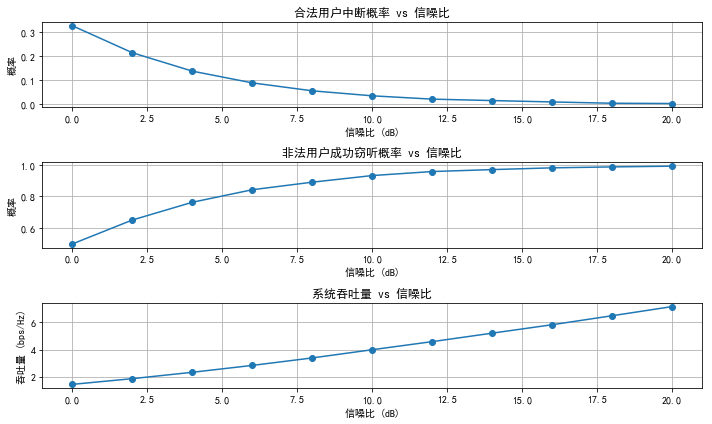

In [22]:
# 可视化结果
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(snr_dbs, legal_interrupt_probs, marker='o', label='合法用户中断概率')
plt.xlabel('信噪比 (dB)')
plt.ylabel('概率')
plt.title('合法用户中断概率 vs 信噪比')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(snr_dbs, eavesdropper_success_probs, marker='o', label='非法用户成功窃听概率')
plt.xlabel('信噪比 (dB)')
plt.ylabel('概率')
plt.title('非法用户成功窃听概率 vs 信噪比')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(snr_dbs, system_throughputs, marker='o', label='系统吞吐量')
plt.xlabel('信噪比 (dB)')
plt.ylabel('吞吐量 (bps/Hz)')
plt.title('系统吞吐量 vs 信噪比')
plt.grid(True)

plt.tight_layout()
plt.show()